In [25]:
import requests
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
def macd_indicator(data,a,b,c):
    """function to calculate MACD
       typical values a = 12; b =26, c =9"""
    data = data.copy()
    data["MA_Fast"]=data["Close"].ewm(span=a,min_periods=a).mean()
    data["MA_Slow"]=data["Close"].ewm(span=b,min_periods=b).mean()
    data["MACD"]=data["MA_Fast"]-data["MA_Slow"]
    data["Signal"]=data["MACD"].ewm(span=c,min_periods=c).mean()
    return (data["MACD"],data["Signal"])

In [ ]:
def macd_indicator(data,a,b,c):
    """function to calculate MACD
       typical values a = 12; b =26, c =9"""
    data = data.copy()
    data["MA_Fast"]=data["Close"].ewm(span=a,min_periods=a).mean()
    data["MA_Slow"]=data["Close"].ewm(span=b,min_periods=b).mean()
    data["MACD"]=data["MA_Fast"]-data["MA_Slow"]
    data["Signal"]=data["MACD"].ewm(span=c,min_periods=c).mean()
    
    return (data["MACD"],data["Signal"])

In [4]:
data = yf.download('EURUSD=X') #, period='', interval='1h')

[*********************100%%**********************]  1 of 1 completed


In [5]:
data#.Close.rolling(10).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0
...,...,...,...,...,...,...
2023-08-30,1.086921,1.094547,1.085611,1.086921,1.086921,0
2023-08-31,1.093255,1.093972,1.083717,1.093255,1.093255,0
2023-09-01,1.084410,1.088080,1.078586,1.084410,1.084410,0


<Axes: xlabel='Datetime'>

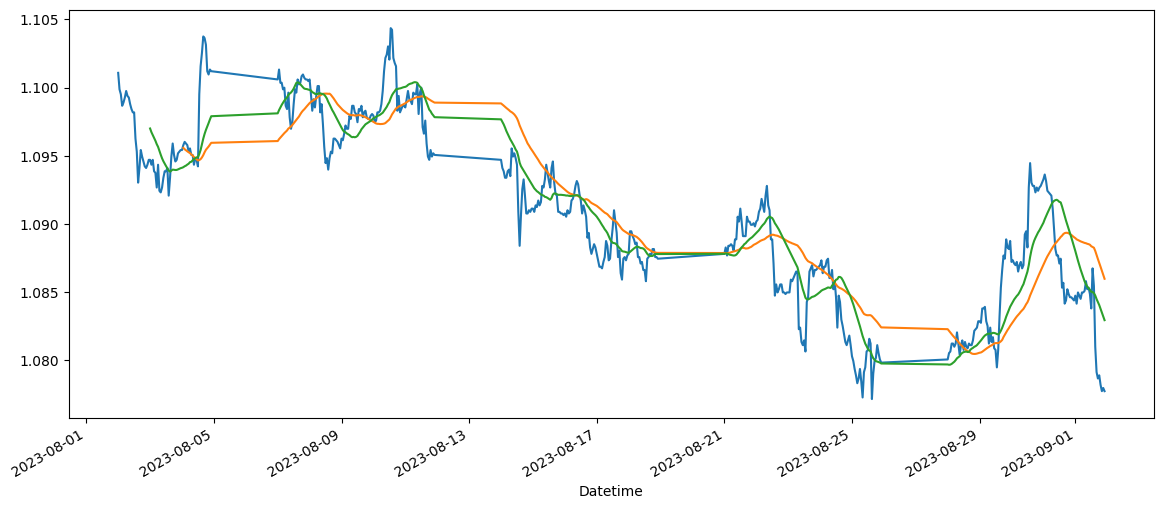

In [34]:
data.Close.plot(figsize=[20,6])
data.Close.rolling(50).mean().plot(figsize=[20,6])
data.Close.rolling(25).mean().plot(figsize=[20,6])

In [20]:
# data['Return'] = data['Adj Close'].pct_change()

# data[['MACD','Signal']] = macd_indicator(data,12,26,9)

data["MA_Fast"]=data["Close"].ewm(span=12,min_periods=12).mean()
data["MA_Slow"]=data["Close"].ewm(span=26,min_periods=26).mean()
data["MACD"]=data["MA_Fast"]-data["MA_Slow"]
data["Signal"]=data["MACD"].ewm(span=9,min_periods=9).mean()

In [26]:
data['Buy|Sell'] = np.where(data['Return']<0,"Sell","Buy")

In [27]:
data

,Open,High,Low,Close,Adj Close,Volume,Return,MA_Fast,MA_Slow,MACD,Signal,Buy|Sell
Date,,,,,,,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0,NaN,NaN,NaN,NaN,NaN,Buy
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0,0.010360,NaN,NaN,NaN,NaN,Buy
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0,0.002813,NaN,NaN,NaN,NaN,Buy
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0,-0.003467,NaN,NaN,NaN,NaN,Sell
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0,0.008775,NaN,NaN,NaN,NaN,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30,1.086921,1.094547,1.085611,1.086921,1.086921,0,0.004033,1.086812,1.091366,-0.004554,-0.003908,Buy
2023-08-31,1.093255,1.093972,1.083717,1.093255,1.093255,0,0.005827,1.087803,1.091506,-0.003703,-0.003867,Buy
2023-09-01,1.084410,1.088080,1.078586,1.084410,1.084410,0,-0.008090,1.087281,1.090980,-0.003699,-0.003833,Sell


In [24]:
# data#.shape
(1.208897-1.196501)/1.208897

data.Return *100


Date
2003-12-01         NaN
2003-12-02    1.036029
2003-12-03    0.281255
2003-12-04   -0.346723
2003-12-05    0.877452
                ...   
2023-08-30    0.403254
2023-08-31    0.582709
2023-09-01   -0.808984
2023-09-04   -0.629295
2023-09-05   -0.354347
Name: Return, Length: 5128, dtype: float64